# Exam 2019: Introduction to programming and numerical analysis 

* **Step 1: Package import:** The first part of the code in our project is the use of libraries with essential packages of panda, numpy and glob which is essential for data structuring and especially arrays and pathnames. On top of that, we import statsmodel XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX We import the scipy package that provides various commonly used optimization algorithms. The sympy package is a Python library for symbolic computation. XXXXXXXXXXXXXXXXXXXXXXXXXX

In [1]:
import numpy as np
import sympy as sm
from sympy import symbols, Eq, solve
from IPython.display import display, Latex, Markdown
from IPython.display import Image
import scipy as sp
from scipy import linalg
from scipy import optimize
from scipy import interpolate

import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt



# Exercise 1: Human capital accumulation

In [2]:
# we assign the parameters with the below values
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

**Question 1.1:** Solve the model in period 2 and illustrate the solution (including labor supply as a function of human capital).

We know that in the second period the worker maximize the utility function with respect to consumption in period 2 and that she is working meaning that $ l_{2} \, = \,\, \in \, {0,1}  $. Thus the worker solves

$$
\begin{eqnarray*}
v_{2}(h_{2}) & = &\max_{l_{2}} \frac{c_2^{1-\rho}}{1-\rho} - \gamma l_2
\\ & \text{s.t.} & \\
c_{2}& = & w h_2 l_2 \\
l_{2}& \in &\{0,1\}
\end{eqnarray*}
$$

In [3]:
# defining the utility expression for periode 2
def utility(c2,rho):
    return ((c2**(1-rho))/(1-rho))

# defining the consumption function for period 2, where it takes the value w * h2 if l2=1 and b if l2=0
def consumption_period2(h2,l2,w,b):
    if l2 == 0:
        return b
    if l2 == 1:
        return h2*w
    
# defining the disutility term for period 2, which takes the value -gamma if she is working and 0 if she is not working    
def disutility(l2,gamma):
    if l2 == 0:
        return gamma*0  
    if l2 == 1:
        return gamma*(-1)

    # defining her utility function for period 2 where all the above functions are inserted     
def v2(h2,l2,rho,w,b,gamma):

    return utility(consumption_period2(h2, l2, w, b),rho) + disutility(l2, gamma)


The **value function** $v_2(h_2)$ measures the household's value of having more human capital at the beginning of period 2.

In [4]:
# Some part of this code is from the lecture slide "Numerical_optimization" by Jeppe Druedal, we have made some adjustment
# so it fits to the exam question

def solve_period_2(w,b,rho,gamma):
    
    # We are defining four below vectors. The first vector "h2_vec" is from the problem definition and the three other
    # vectors are just empty vector with space for 100 numbers
    h2_vec = np.linspace(0.1,1.5,100)
    l2_vec = np.empty(100)
    c2_vec = np.empty(100)
    v2_vec = np.empty(100)
    
    # we now use the enumerate function the give a index to all the hundred numbers in the "h2_vec"
    for i,h2 in enumerate(h2_vec):
        
        # we declare the utility function when she is working and when she is not working inside the enumerate,
        # because we use the h2 values from the "h2_vec"
        v2_work = v2(h2,1,rho,w,b,gamma)
        v2_nowork = v2(h2,0,rho,w,b,gamma)
        
        # we are making a if statement where we append the empty "v2_vec" array with the highest value
        # of utility from working or not working.  
        if v2_work > v2_nowork:
            v2_vec[i] = v2_work
        if v2_nowork > v2_work:
            v2_vec[i] = v2_nowork
        
        # we now that when utility is higher from working she will choose to work which means that we then append the 
        # l2_vec with 1 and if the utility is lower from working we append the vector with 0
        if v2_work > v2_nowork:
            l2_vec[i] = 1
        if v2_work < v2_nowork:
            l2_vec[i] = 0  
        # We append the c2_vec the consumption function in period 2, that are depending on rather she is working or not working   
        c2_vec[i] = consumption_period2(h2,l2_vec[i],w,b)
        
    return h2_vec,v2_vec,l2_vec,c2_vec

In [5]:
# we now sole the period 2 model by first assigning all values to different vectors
h2_vec,v2_vec,l2_vec,c2_vec = solve_period_2(w,b,rho,gamma); # we use the code string from Jeppe Druedal

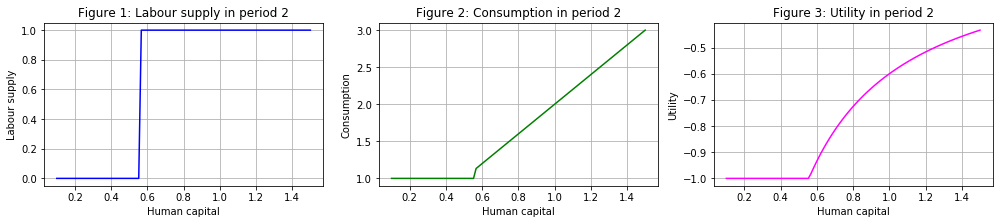

In [65]:
fig = plt.figure(figsize=(17,3))
fig.add_subplot(1,3,1)
plt.grid()
plt.axis('auto')
plt.plot(h2_vec,l2_vec, color='blue', linestyle='solid') #man kunne også skrive solid i stedet for dashed 
plt.title("Figure 1: Labour supply in period 2")
plt.xlabel("Human capital")
plt.ylabel("Labour supply");  # dotted red - en kortere måde at skrive det på

fig.add_subplot(1,3,2)
plt.grid()
plt.axis('auto')
plt.plot(h2_vec,c2_vec, color='green', linestyle='solid') #man kunne også skrive solid i stedet for dashed 
plt.title("Figure 2: Consumption in period 2")
plt.xlabel("Human capital")
plt.ylabel("Consumption");  # dotted red - en kortere måde at skrive det på


fig.add_subplot(1,3,3)
plt.grid()
plt.axis('auto')
plt.plot(h2_vec,v2_vec, color='magenta', linestyle='solid') #man kunne også skrive solid i stedet for dashed 
plt.title("Figure 3: Utility in period 2")
plt.xlabel("Human capital")
plt.ylabel("Utility");  # dotted red - en kortere måde at skrive det på


In [7]:
#Udregn hvor meget human capital der skal til før hun begynder at arbejde

**Question 1.2:** Solve the model in period 1 and illustrate the solution (including labor supply as a function of human capital).

We know that in the first period the worker maximize the utility function with respect to consumption in period 1, human capital in period 2 which is determined by human capital in period 1, labour in period 1 and stochastic experience gain. Moreover we see that in the utility function for period 1 we now have a extra terma that captures the expected utility in period 2. Thus the worker solves

$$
\begin{eqnarray*}
v_{1}(h_{1}) &=& \max_{l_{1}} \frac{c_1^{1-\rho}}{1-\rho} - \gamma l_1 + \beta\mathbb{E}_{1}\left[v_2(h_2)\right]
\\ & \text{s.t.} & \\
c_1 &=& w h_1 l_1 \\
h_2 &=& h_1 + l_1 + \begin{cases}
0 & \text{with prob. }0.5\\
\Delta & \text{with prob. }0.5 
\end{cases}\\
l_{1} &\in& \{0,1\}\\
\end{eqnarray*}
$$

where $\beta$ is the **discount factor** and $\mathbb{E}_{1}\left[v_2(h_2)\right]$ is the **expected value of living in period two**.



In [8]:
v2_interp = interpolate.RegularGridInterpolator([h2_vec], v2_vec,
                                                bounds_error=False,fill_value=None)

In [9]:
# defining the utility expression for periode 1 - these code strings are taken from the lecture slide "Numerical_optimization" written by Jeppe Druedal
# we have adjusted it to the exam

# defining consumption in period 1
def consumption_period1(h1,l1,w,b):
    if l1 == 0:
        return b
    if l1 == 1:
        return h1*w
    
def v1(h1,l1,w,rho,b,gamma,beta,Delta,v2_interp):
    
    # we define the value for human capital in the second period and utility in the second period if the extra term are zero with probability 1/2
    h2_low = h1 + l1
    v2_low = v2_interp([h2_low])[0]
    
    # we define the value for human capital in the second period and utility in the second period if the extra term are Delta with probability 1/2
    h2_high = h1 + l1 + Delta
    v2_high = v2_interp([h2_high])[0]
    
    # we define the last term in the utility function for period 1, which is the expected value of utility in period 2
    v2 = 0.5 * v2_low + 0.5 * v2_high
    
    # the total value of utility on period 1, which is determined by consumption in period 1, disutility and the expected value of utility in period 2
    return utility(consumption_period1(h1, l1, w, b),rho) + disutility(l1, gamma) + beta*v2


In [10]:
def solve_period_1(w,rho,b,gamma,beta,Delta,v2_interp):
    # We are defining four below vectors. The first vector "h1_vec" is from the problem definition and the three other
    # vectors are just empty vector with space for 100 numbers
    h1_vec = np.linspace(0.1,1.5,100)
    l1_vec = np.empty(100)
    c1_vec = np.empty(100)
    v1_vec = np.empty(100)
    
    # b. solve for each h1 in grid
    for i,h1 in enumerate(h1_vec):
        
        # we declare the utility function when she is working and when she is not working inside the enumerate,
        # because we use the h1 values from the "h1_vec"
        v1_work = v1(h1,1,w,rho,b,gamma,beta,Delta,v2_interp)
        v1_nowork = v1(h1,0,w,rho,b,gamma,beta,Delta,v2_interp)
        
        # we are making a if statement where we append the empty "v1_vec" array with the highest value
        # of utility from working or not working.  
        if v1_work > v1_nowork:
            v1_vec[i] = v1_work
        if v1_nowork > v1_work:
            v1_vec[i] = v1_nowork
        
        # we now that when utility is higher from working she will choose to work which means that we then append the 
        # l1_vec with 1 and if the utility is lower from working we append the vector with 0
        if v1_work > v1_nowork:
            l1_vec[i] = 1
        if v1_work < v1_nowork:
            l1_vec[i] = 0  
        # We append the c1_vec the consumption function in period 1, that are depending on rather she is working or not working   
        c1_vec[i] = consumption_period1(h1,l1_vec[i],w,b)
        
    return h1_vec,v1_vec,l1_vec,c1_vec


In [66]:
# solving for period 2 and assigning values to different vectors.
h1_vec,v1_vec,l1_vec,c1_vec = solve_period_1(w,rho,b,gamma,beta,Delta,v2_interp);

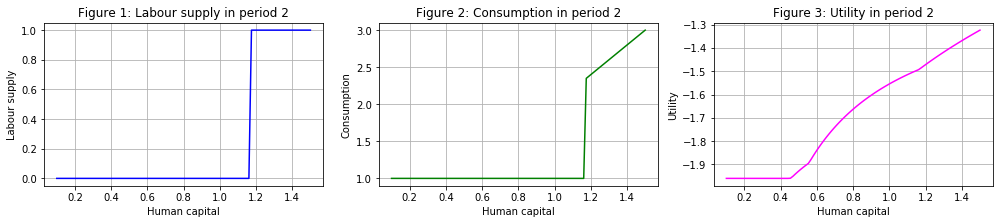

In [67]:
fig = plt.figure(figsize=(17,3))
fig.add_subplot(1,3,1)
plt.grid()
plt.axis('auto')
plt.plot(h1_vec,l1_vec, color='blue', linestyle='solid') #man kunne også skrive solid i stedet for dashed 
plt.title("Figure 1: Labour supply in period 2")
plt.xlabel("Human capital")
plt.ylabel("Labour supply");  # dotted red - en kortere måde at skrive det på

fig.add_subplot(1,3,2)
plt.grid()
plt.axis('auto')
plt.plot(h1_vec,c1_vec, color='green', linestyle='solid') #man kunne også skrive solid i stedet for dashed 
plt.title("Figure 2: Consumption in period 2")
plt.xlabel("Human capital")
plt.ylabel("Consumption");  # dotted red - en kortere måde at skrive det på


fig.add_subplot(1,3,3)
plt.grid()
plt.axis('auto')
plt.plot(h1_vec,v1_vec, color='magenta', linestyle='solid') #man kunne også skrive solid i stedet for dashed 
plt.title("Figure 3: Utility in period 2")
plt.xlabel("Human capital")
plt.ylabel("Utility");  # dotted red - en kortere måde at skrive det på

**Question 3:** Will the worker never work if her potential wage income is lower than the unemployment benefits she can get? Explain and illustrate why or why not.

# Exercise 2: AS-AD model

Consider an **exchange economy** with

1. 3 goods, $(x_1,x_2,x_3)$
2. $N$ consumers indexed by \\( j \in \{1,2,\dots,N\} \\)
3. Preferences are Cobb-Douglas with log-normally distributed coefficients

    $$ \begin{eqnarray*}
    u^{j}(x_{1},x_{2},x_{3}) &=& 
    \left(x_{1}^{\beta_{1}^{j}}x_{2}^{\beta_{2}^{j}}x_{3}^{\beta_{3}^{j}}\right)^{\gamma}\\
     &  & \,\,\,\beta_{i}^{j}=\frac{\alpha_{i}^{j}}{\alpha_{1}^{j}+\alpha_{2}^{j}+\alpha_{3}^{j}} \\
     &  & \,\,\,\boldsymbol{\alpha}^{j}=(\alpha_{1}^{j},\alpha_{2}^{j},\alpha_{3}^{j}) \\ 
     &  & \,\,\,\log(\boldsymbol{\alpha}^j) \sim \mathcal{N}(\mu,\Sigma) \\
    \end{eqnarray*} $$

4. Endowments are exponentially distributed,

$$
\begin{eqnarray*}
\boldsymbol{e}^{j} &=& (e_{1}^{j},e_{2}^{j},e_{3}^{j}) \\
 &  & e_i^j \sim f, f(z;\zeta) =  1/\zeta \exp(-z/\zeta)
\end{eqnarray*}
$$

Let $p_3 = 1$ be the **numeraire**. The implied **demand functions** are:

$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}} \\
\end{eqnarray*}
$$

where consumer $j$'s income is

$$I^j = p_1 e_1^j + p_2 e_2^j +p_3 e_3^j$$

The **parameters** and **random preferences and endowments** are given by:

In [13]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)


**Question 1:** Plot the histograms of the budget shares for each good across agents.

The equilibrium conditions (demand = supply) were:

\\[ 
\begin{eqnarray*}
\sum_{j=1}^N x_{1}^{\star j}(p_{1},p_{2},e^{j}) &=& Nk \Leftrightarrow Z_1 \equiv \sum_{j=1}^N x_{1}^{\star j}(p_{1},p_{2},e^{j}) - Nk = 0 \\
\sum_{j=1}^N x_{2}^{\star j}(p_{1},p_{2},e^{j}) &=& N \Leftrightarrow Z_2 \equiv \sum_{j=1}^N x_{2}^{\star j}(p_{1},p_{2},e^{j}) - N = 0
\end{eqnarray*}
\\]

Consider the **excess demand functions:**

$$ z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j$$

**Question 2:** Plot the excess demand functions.

In [68]:
# b. demand functions
def demand_good_1_func(betas,p1,p2,p3,e1,e2,e3):
    I = e1*p1+e2*p2+e3*p3
    return betas[:,1]*I/p1

def demand_good_2_func(betas,p1,p2,p3,e1,e2,e3):
    I = e1*p1+e2*p2+e3*p3
    return betas[:,2]*I/p2

def demand_good_3_func(betas,p1,p2,p3,e1,e2,e3):
    I = e1*p1+e2*p2+e3*p3
    return betas[:,3]*I/p3

def excess_demand_good_1_func(alphas,betas,p1,p2,p3,e1,e2,e3):
    
    # a. demand
    demand = np.sum(demand_good_1_func(betas,p1,p2,p3,e1,e2,e3))
    
    # b. supply
    supply = np.sum(e1)
    
    # c. excess demand
    excess_demand = demand-supply
    
    return excess_demand

def excess_demand_good_2_func(alphas,betas,p1,p2,p3,e1,e2,e3):
    
    # a. demand
    demand = np.sum(demand_good_2_func(betas,p1,p2,p3,e1,e2,e3))
    
    # b. supply
    supply = np.sum(e2)
    
    # c. excess demand
    excess_demand = demand-supply
    
    return excess_demand

def excess_demand_good_3_func(alphas,betas,p1,p2,p3,e1,e2,e3):
    
    # a. demand
    demand = np.sum(demand_good_3_func(betas,p1,p2,p3,e1,e2,e3))
    
    # b. supply
    supply = np.sum(e3)
    
    # c. excess demand
    excess_demand = demand-supply
    
    return excess_demand

In [24]:
# Generate two 1-D arrays for the prices

p1_vec = np.linspace(0.1,15,100)
p2_vec = np.linspace(0.1,15,100)
p3 = 1
excess

for i,p1 in enumerate(p1_vec):
    for i,p2 in enumerate(p2_vec):
        


0 0.1
1 0.2505050505050505
2 0.40101010101010104
3 0.5515151515151515
4 0.702020202020202
5 0.8525252525252525
6 1.0030303030303032
7 1.1535353535353536
8 1.304040404040404
9 1.4545454545454546
10 1.605050505050505
11 1.7555555555555555
12 1.9060606060606062
13 2.0565656565656565
14 2.207070707070707
15 2.3575757575757574
16 2.508080808080808
17 2.658585858585859
18 2.809090909090909
19 2.95959595959596
20 3.11010101010101
21 3.2606060606060607
22 3.411111111111111
23 3.5616161616161617
24 3.7121212121212124
25 3.8626262626262626
26 4.013131313131313
27 4.163636363636363
28 4.314141414141414
29 4.4646464646464645
30 4.615151515151514
31 4.765656565656565
32 4.916161616161616
33 5.066666666666666
34 5.217171717171717
35 5.367676767676767
36 5.518181818181818
37 5.668686868686868
38 5.819191919191919
39 5.969696969696969
40 6.1202020202020195
41 6.27070707070707
42 6.421212121212121
43 6.571717171717172
44 6.722222222222221
45 6.872727272727272
46 7.023232323232323
47 7.1737373737373735
